In [1]:
#My dataset is available in googledrive; so I am accessing my drive from colab
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
#Once this is executed, you will see your drive appearing on the left hand side

Mounted at /content/drive


In [2]:
# Define paths to the dataset
train_dir = '/content/drive/MyDrive/pizza_not_pizza/train'  # Update with your actual path
test_dir = '/content/drive/MyDrive/pizza_not_pizza/test'    # Update with your actual path

In [3]:
import os
print(len(os.listdir('/content/drive/MyDrive/pizza_not_pizza/train/pizza')))
print(len(os.listdir('/content/drive/MyDrive/pizza_not_pizza/train/not_pizza')))
print(len(os.listdir('/content/drive/MyDrive/pizza_not_pizza/test/pizza')))
print(len(os.listdir('/content/drive/MyDrive/pizza_not_pizza/test/not_pizza')))

855
855
128
128


In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create ImageDataGenerator for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Split 20% of the images for validation
)

# Load and prepare training data
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',  # 'binary' for binary classification (cats vs. dogs)
    subset='training'  # Specify 'training' for the training set
)

# Create ImageDataGenerator for validation set
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Note: Using the same validation split as in the training set
)

# Load and prepare validation data
validation_data = validation_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',
    subset='validation'  # Specify 'validation' for the validation set
)

Found 1368 images belonging to 2 classes.
Found 342 images belonging to 2 classes.


In [5]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

resnet_model = Sequential()    #ResNet50 is a pre-trained model
pretrained_model = tf.keras.applications.ResNet50(include_top = False, #because i have my own image of a diff dimension
                                                input_shape = (256,256,3),
                                                pooling = 'max', classes = 2,
                                                weights = 'imagenet')
for layer in pretrained_model.layers:
    layer.trainable = False  #all layers in the Resnet50 is not trainable; keep those weights; I am going to add my own i/p and other layers

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation = 'relu'))
resnet_model.add(Dense(1, activation = 'sigmoid'))

94765736/94765736 [==============================] - 1s 0us/step


In [6]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 1)                 513       
                                                                 
Total params: 24,637,313
Trainable params: 1,049,601
Non-trainable params: 23,587,712
_________________________________________________________________


In [7]:
from keras.optimizers import Adam
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy']) #binary_crossentropy - binary classification

In [8]:
history = resnet_model.fit(train_data, epochs=3, validation_data=validation_data)

Epoch 1/3
43/43 [==============================] - 533s 12s/step - loss: 1.5798 - accuracy: 0.5497 - val_loss: 0.6439 - val_accuracy: 0.6199
Epoch 2/3
43/43 [==============================] - 553s 13s/step - loss: 0.7002 - accuracy: 0.6031 - val_loss: 0.6413 - val_accuracy: 0.6257
Epoch 3/3
43/43 [==============================] - 493s 12s/step - loss: 0.6054 - accuracy: 0.6827 - val_loss: 0.6125 - val_accuracy: 0.6345


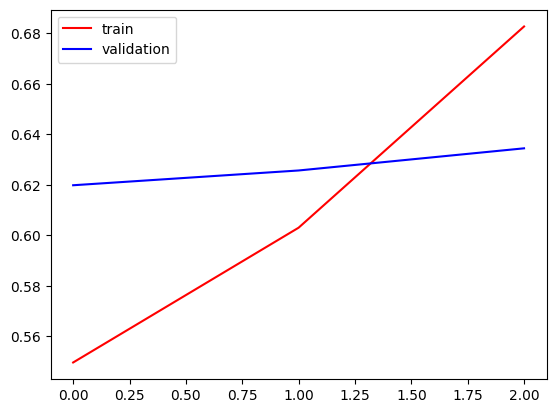

In [9]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

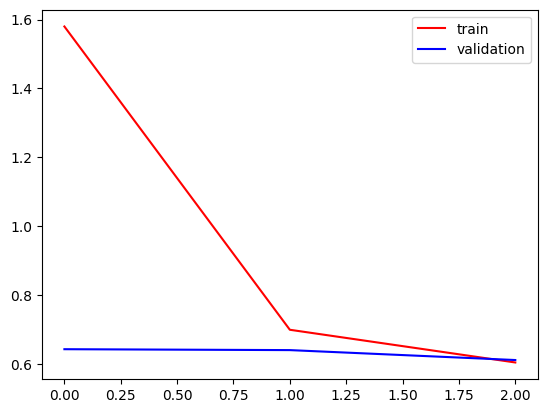

In [10]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [11]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

Found 256 images belonging to 2 classes.


In [12]:
#predict the test data
predictions = resnet_model.predict(test_data)
print(predictions)

8/8 [==============================] - 74s 9s/step
[[0.42415398]
 [0.4764401 ]
 [0.54290116]
 [0.9001901 ]
 [0.7041765 ]
 [0.73479146]
 [0.72058964]
 [0.33572507]
 [0.9025268 ]
 [0.5509001 ]
 [0.4579568 ]
 [0.43299332]
 [0.9383213 ]
 [0.3494607 ]
 [0.969944  ]
 [0.7176797 ]
 [0.75132877]
 [0.48295352]
 [0.39394942]
 [0.9398814 ]
 [0.8178954 ]
 [0.822904  ]
 [0.28949746]
 [0.9345747 ]
 [0.7025772 ]
 [0.8499143 ]
 [0.39972833]
 [0.6449482 ]
 [0.61685437]
 [0.8204924 ]
 [0.8002912 ]
 [0.24318367]
 [0.7147758 ]
 [0.2871102 ]
 [0.578967  ]
 [0.5859248 ]
 [0.51924366]
 [0.54599065]
 [0.6038076 ]
 [0.18791635]
 [0.74525446]
 [0.8193377 ]
 [0.39260006]
 [0.7236644 ]
 [0.5238529 ]
 [0.5274976 ]
 [0.7992005 ]
 [0.8900344 ]
 [0.42838067]
 [0.8250619 ]
 [0.59095997]
 [0.73221093]
 [0.8686997 ]
 [0.47445604]
 [0.23692027]
 [0.5961736 ]
 [0.84026486]
 [0.58695334]
 [0.2029427 ]
 [0.47725785]
 [0.6444566 ]
 [0.6006683 ]
 [0.8138092 ]
 [0.8575198 ]
 [0.63341266]
 [0.39344314]
 [0.71038014]
 [0.3801366

In [13]:
len(predictions)

256

In [14]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjust the threshold as needed

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[37 91]
 [32 96]]
Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.29      0.38       128
           1       0.51      0.75      0.61       128

    accuracy                           0.52       256
   macro avg       0.52      0.52      0.49       256
weighted avg       0.52      0.52      0.49       256

